In [56]:
import pandas as pd
import numpy as np
import seaborn as sns

In [57]:
df = pd.read_csv('aug_train.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [58]:
df.shape

(19158, 14)

<AxesSubplot:>

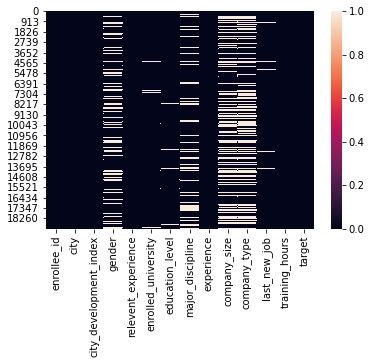

In [59]:
sns.heatmap(df.isnull())

In [60]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [61]:
df['city'].value_counts()

city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_111       3
city_129       3
city_121       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

### One hot encodeing

In [63]:
cat_var = df[['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job']]

In [64]:
cat_dum = pd.get_dummies(cat_var,drop_first=True)

In [65]:
cat_dum

,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19154,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19155,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
19156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [66]:
m =df.drop(['city','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job','target'],axis=1)

In [67]:
y_train = df.iloc[:,-1]

In [68]:
y_train

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64

In [69]:
m

,enrollee_id,city_development_index,training_hours
0,8949,0.920,36
1,29725,0.776,47
2,11561,0.624,83
3,33241,0.789,52
4,666,0.767,8
...,...,...,...
19153,7386,0.878,42
19154,31398,0.920,52
19155,24576,0.920,44
19156,5756,0.802,97


In [70]:
x_train = pd.concat([m,cat_dum],axis=1)

In [71]:
x_train.shape

(19158, 177)

<AxesSubplot:>

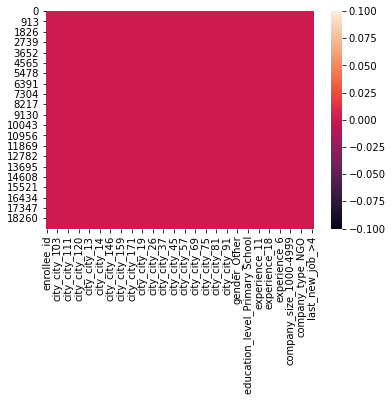

In [72]:
sns.heatmap(x_train.isnull())

In [73]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df1 = pd.DataFrame(min_max.fit_transform(x_train),columns=x_train.columns)

In [74]:
df1.head()

,enrollee_id,city_development_index,training_hours,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.268073,0.942116,0.104478,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.890500,0.654691,0.137313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.346326,0.351297,0.244776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.995836,0.680639,0.152239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.019923,0.636727,0.020896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [75]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=10)
df2 = pd.DataFrame(imp.fit_transform(df1),columns= df1.columns)

<AxesSubplot:>

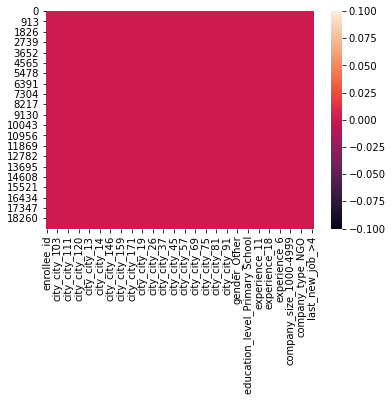

In [76]:
sns.heatmap(df2.isnull())

In [77]:
### test data handling

In [78]:
test_df = pd.read_csv('aug_test.csv')

In [79]:
test_df.shape

(2129, 13)

In [80]:
test_df.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

<AxesSubplot:>

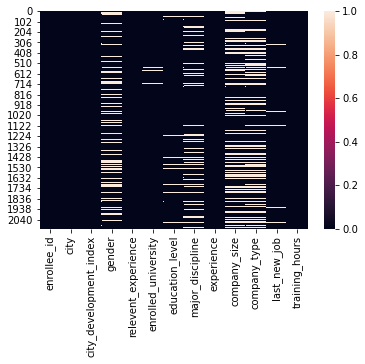

In [81]:
sns.heatmap(test_df.isnull())

In [82]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [83]:
test_df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [84]:
for i in cat_var:
    print(i,len(test_df[i].value_counts()),'    ',len(df[i].value_counts()))

city 108      123
gender 3      3
relevent_experience 2      2
enrolled_university 3      3
education_level 5      5
major_discipline 6      6
experience 22      22
company_size 8      8
company_type 6      6
last_new_job 6      6


we can see there is a difference in categorical variables in categorical feature city

so we can drop the features in train data

In [85]:
test_df['city'].value_counts().index

Index(['city_103', 'city_21', 'city_16', 'city_114', 'city_160', 'city_136',
       'city_67', 'city_75', 'city_102', 'city_11',
       ...
       'city_31', 'city_84', 'city_157', 'city_133', 'city_139', 'city_171',
       'city_79', 'city_107', 'city_54', 'city_117'],
      dtype='object', length=108)

In [86]:
df['city'].value_counts().index

Index(['city_103', 'city_21', 'city_16', 'city_114', 'city_160', 'city_136',
       'city_67', 'city_75', 'city_102', 'city_104',
       ...
       'city_8', 'city_18', 'city_166', 'city_82', 'city_25', 'city_111',
       'city_129', 'city_121', 'city_171', 'city_140'],
      dtype='object', length=123)

In [87]:
c =[]
for i in df['city'].value_counts().index:
    if i not in test_df['city'].value_counts().index:
        c.append('city_'+i)

In [88]:
c

['city_city_7',
 'city_city_55',
 'city_city_59',
 'city_city_109',
 'city_city_131',
 'city_city_146',
 'city_city_81',
 'city_city_120',
 'city_city_62',
 'city_city_8',
 'city_city_18',
 'city_city_166',
 'city_city_111',
 'city_city_129',
 'city_city_140']

In [89]:
df2.drop(c,axis=1,inplace=True)

In [90]:
df2.shape

(19158, 162)

In [91]:
test_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [92]:
test_dum = pd.get_dummies(test_df,drop_first=True)

In [93]:
test_dum.shape

(2129, 162)

In [94]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
test_df1 =pd.DataFrame(min_max.fit_transform(test_dum),columns=test_dum.columns)

In [95]:
test_df1.shape

(2129, 162)

In [96]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors=5)
test_df2 = pd.DataFrame(impute.fit_transform(test_df1),columns= test_df1.columns)

In [97]:
test_df2

,enrollee_id,city_development_index,training_hours,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.971514,0.756487,0.060060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.295502,0.942116,0.291291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.953613,0.351297,0.042042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.821049,0.756487,0.114114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.831214,0.942116,0.213213,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,0.038561,0.942116,0.042042,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2125,0.005757,0.896208,0.087087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2126,0.952294,0.876248,0.051051,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2127,0.235982,0.710579,0.249249,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
train_df2 =df2.drop(['enrollee_id'],axis=1)
test_df2 = test_df2.drop(['enrollee_id'],axis =1)

In [99]:
train_df2

,city_development_index,training_hours,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,...,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.942116,0.104478,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.654691,0.137313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.351297,0.244776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.680639,0.152239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.636727,0.020896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.858283,0.122388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19154,0.942116,0.152239,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
19155,0.942116,0.128358,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
19156,0.706587,0.286567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [100]:
y_train

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19153    1.0
19154    1.0
19155    0.0
19156    0.0
19157    0.0
Name: target, Length: 19158, dtype: float64

In [101]:
k = train_df2.columns
kk =[]

In [102]:
k = train_df2.columns
kk =[]
for i in k:
    if '>' in i:
        kk.append(i.replace('>',' greater than '))
    elif '<' in i:
        kk.append(i.replace('<',' less than '))
    else:
        kk.append(i)
                  

In [103]:
k

Index(['city_development_index', 'training_hours', 'city_city_10',
       'city_city_100', 'city_city_101', 'city_city_102', 'city_city_103',
       'city_city_104', 'city_city_105', 'city_city_106',
       ...
       'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd', 'last_new_job_2',
       'last_new_job_3', 'last_new_job_4', 'last_new_job_>4',
       'last_new_job_never'],
      dtype='object', length=161)

In [104]:
kk

['city_development_index',
 'training_hours',
 'city_city_10',
 'city_city_100',
 'city_city_101',
 'city_city_102',
 'city_city_103',
 'city_city_104',
 'city_city_105',
 'city_city_106',
 'city_city_107',
 'city_city_11',
 'city_city_114',
 'city_city_115',
 'city_city_116',
 'city_city_117',
 'city_city_118',
 'city_city_12',
 'city_city_121',
 'city_city_123',
 'city_city_126',
 'city_city_127',
 'city_city_128',
 'city_city_13',
 'city_city_133',
 'city_city_134',
 'city_city_136',
 'city_city_138',
 'city_city_139',
 'city_city_14',
 'city_city_141',
 'city_city_142',
 'city_city_143',
 'city_city_144',
 'city_city_145',
 'city_city_149',
 'city_city_150',
 'city_city_152',
 'city_city_155',
 'city_city_157',
 'city_city_158',
 'city_city_159',
 'city_city_16',
 'city_city_160',
 'city_city_162',
 'city_city_165',
 'city_city_167',
 'city_city_171',
 'city_city_173',
 'city_city_175',
 'city_city_176',
 'city_city_179',
 'city_city_180',
 'city_city_19',
 'city_city_2',
 'city_ci

In [105]:
train_df2.columns = kk

In [106]:
test_df2.columns = kk

In [107]:
import xgboost
xg1 = xgboost.XGBClassifier()
reg1 = xg1.fit(train_df2,y_train) 

C:\Users\nandh\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [108]:
y_pred = reg1.predict(test_df2)

In [109]:
y_pred.shape

(2129,)

In [110]:
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [111]:
sam = pd.read_csv('sample_submission (1).csv')
predi_data = pd.DataFrame(y_pred)
sample = pd.concat([sam['enrollee_id'],predi_data],axis=1)

In [112]:
sample.columns= ['enrollee_id','target']
sample.to_csv('sample_submission.csv',index=False)


In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train[0:2129],y_pred)

0.6434945984030062

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,f1_score
mod = DecisionTreeClassifier()
mod = mod.fit(train_df2,y_train)

In [115]:
y_pred = mod.predict(test_df2)

In [116]:
y_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [117]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train[0:2129],y_pred)

0.6073273837482386